#Grouping Datasets

During data analysis, it is often essential to cluster or group data together based on certain criteria. For example, an e-commerce store might want to group all the sales that were done during the Christmas period or the orders that were received on Black Friday. These grouping concepts occur in several parts of data analysis. We will cover the
fundamentals of grouping techniques and how doing this can improve data analysis. 
We will discuss different groupby() mechanics that will accumulate our dataset into various
classes that we can perform aggregation on. We will also figure out how to dissect this
categorical data with visualization by utilizing pivot tables and cross-tabulations.

We will cover the following topics:
* Understanding groupby()
* Groupby mechanics
* Data aggregation
* Pivot tables and cross-tabulations

##Understanding groupby()

During the data analysis phase, categorizing a dataset into multiple categories or groups is
often essential. We can do such categorization using the pandas library. The pandas
groupby function is one of the most efficient and time-saving features for doing this.
Groupby provides functionalities that allow us to split-apply-combine throughout the
dataframe; that is, this function can be used for splitting, applying, and combining
dataframes.
Similar to the Structured Query Language (SQL), we can use pandas and Python to
execute more complex group operations by using any built-in functions that accept the
pandas object or the numpy array.
We are going to look into the groupby mechanics using the pandas
library. 

##Group by Mechanics
While working with the pandas dataframes, our analysis may require us to split our data
by certain criteria. Groupby mechanics accumulates our dataset into various classes in which we
can perform exercises and make changes, such as the following:
* Grouping by features, hierarchically
* Aggregating a dataset by groups
* Applying custom aggregation functions to groups
* Transforming a dataset groupwise

The pandas groupby method performs two essential functions:
* It splits the data into groups based on some criteria.
* It applies a function to each group independently.

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("https://drive.google.com/uc?id=1LxzyZFTYav2PUaOzxUKla0gT31CLkpN1")
df.head()



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


As you can see there are multiple columns with categoical variable. Using groupby() function lets group these data set on the basis of body-style.

In [ ]:
#groups dataframe according to body-style and prints the keys of groups
df.groupby('body-style').groups.keys()


dict_keys(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])

From the preceding output, we know that the body-style column has five
unique values, including convertible, hardtop, hatchback, sedan, and
wagon. 

Now, we can group the data based on the body-style column. Next, let's print
the values contained in that group that have the body-style value of
convertible. This can be done using the following code:

In [ ]:
style = df.groupby('body-style')
#To print the values contained in group convertible
style.get_group("convertible")


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,35056
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595


##Selecting a subset of columns
To form groups based on multiple categories, we can simply specify the column names in
the groupby() function. Grouping will be done simultaneously with the first category, the
second category, and so on.
Let's groupby using two categories, body-style and drive wheels, as follows: 

In [ ]:
double_grouping = df.groupby(["body-style","drive-wheels"])
#To print the first values contained in each group
double_grouping.first()

symboling normalized-losses           make  \
body-style  drive-wheels                                               
convertible fwd                   3                 ?     volkswagen   
            rwd                   3                 ?    alfa-romero   
hardtop     fwd                   2               168         nissan   
            rwd                   0                93  mercedes-benz   
hatchback   4wd                   0                 ?           audi   
            fwd                   2               121      chevrolet   
            rwd                   1                 ?    alfa-romero   
sedan       4wd                   2               164           audi   
            fwd                   2               164           audi   
            rwd                   2               192            bmw   
wagon       4wd                   0                85         subaru   
            fwd                   1                 ?           audi   
            rwd                  -1                93  mercedes-benz   

                         fuel-type aspiration num-of-doors engine-location  \
body-style  drive-wheels                                                     
convertible fwd                gas        std          two           front   
            rwd                gas        std          two           front   
hardtop     fwd                gas        std          two           front   
            rwd             diesel      turbo          two           front   
hatchback   4wd                gas      turbo          two           front   
            fwd                gas        std          two           front   
            rwd                gas        std          two           front   
sedan       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd                gas        std          two           front   
wagon       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd             diesel      turbo         four           front   

                          wheel-base  length  width  ...  engine-size  \
body-style  drive-wheels                             ...                
convertible fwd                 94.5   159.3   64.2  ...          109   
            rwd                 88.6   168.8   64.1  ...          130   
hardtop     fwd                 95.1   162.4   63.8  ...           97   
            rwd                106.7   187.5   70.3  ...          183   
hatchback   4wd                 99.5   178.2   67.9  ...          131   
            fwd                 88.4   141.1   60.3  ...           61   
            rwd                 94.5   171.2   65.5  ...          152   
sedan       4wd                 99.4   176.6   66.4  ...          136   
            fwd                 99.8   176.6   66.2  ...          109   
            rwd                101.2   176.8   64.8  ...          108   
wagon       4wd                 96.9   173.6   65.4  ...          108   
            fwd                105.8   192.7   71.4  ...          136   
            rwd                110.0   190.9   70.3  ...          183   

                          fuel-system  bore stroke  compression-ratio  \
body-style  drive-wheels                                                
convertible fwd                  mpfi  3.19    3.4                8.5   
            rwd                  mpfi  3.47   2.68                9.0   
hardtop     fwd                  2bbl  3.15   3.29                9.4   
            rwd                   idi  3.58   3.64               21.5   
hatchback   4wd                  mpfi  3.13    3.4                7.0   
            fwd                  2bbl  2.91   3.03                9.5   
            rwd                  mpfi  2.68   3.47                9.0   
sedan       4wd      

Not only can we group the dataset with specific criteria, but we can also perform arithmetic
operations directly on the whole group at the same time and print the output as a series or
dataframe. There are functions such as max(), min(), mean(), first(), and last() that
can be directly applied to the GroupBy object in order to obtain summary statistics for each
group.

##Max and min
Let's compute the maximum and minimum entry for each group. Here, we will find the
maximum and minimum for the normalized-losses column:

In [ ]:
# max() will print the maximum entry of each group 
style['normalized-losses'].max()
# min() will print the minimum entry of each group 
style['normalized-losses'].min()

body-style
convertible    134
hardtop        134
hatchback      101
sedan          102
wagon          103
Name: normalized-losses, dtype: object

In [ ]:

# style['normalized-losses'].min() will print output in series 
print(style['normalized-losses'].min())

# style[['normalized-losses']].min() will print output in data frame 
print(style[['normalized-losses']].min())

body-style
convertible    134
hardtop        134
hatchback      101
sedan          102
wagon          103
Name: normalized-losses, dtype: object
            normalized-losses
body-style                   
convertible               134
hardtop                   134
hatchback                 101
sedan                     102
wagon                     103


##Mean
We can find the mean values for the numerical column in each group. 

This can be done
using the df.mean() method.

In [ ]:
# mean() will print mean of numerical column in each group
style.mean()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
body-style,,,,,,,,,,
convertible,2.833333,92.700000,170.383333,65.583333,51.433333,2801.666667,157.166667,8.933333,20.500000,26.000000
hardtop,1.875000,98.500000,176.937500,66.612500,52.850000,2810.625000,176.250000,10.725000,21.625000,27.250000
hatchback,1.585714,95.535714,166.592857,65.247143,52.108571,2348.185714,114.400000,9.027429,26.314286,32.171429
sedan,0.333333,100.619792,177.585417,66.260417,54.337500,2610.593750,130.822917,10.937500,25.322917,30.833333
wagon,-0.160000,102.156000,181.304000,66.256000,56.728000,2784.240000,123.840000,10.316000,24.040000,28.720000


In [ ]:
# get mean of each column of specific group
style.get_group("convertible").mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


symboling            2.833333e+00
wheel-base           9.270000e+01
length               1.703833e+02
width                6.558333e+01
height               5.143333e+01
curb-weight          2.801667e+03
engine-size          1.571667e+02
compression-ratio    8.933333e+00
horsepower           1.851853e+15
peak-rpm             8.334167e+22
city-mpg             2.050000e+01
highway-mpg          2.600000e+01
price                2.249194e+28
dtype: float64

In [ ]:
# get the sum of the price for each body-style group
style['price'].sum()

body-style
convertible                       134951650035056370281766911595
hardtop                    2817645400824932528340288449963911199
hatchback      16500?5151629555726377795762291296464796855539...
sedan          1395017450152501771023875164301692520970211052...
wagon          1892089217295282487349799914399124401386016695...
Name: price, dtype: object

In [ ]:
# get the number of symboling/records in each group
style['symboling'].count()

body-style
convertible     6
hardtop         8
hatchback      70
sedan          96
wagon          25
Name: symboling, dtype: int64

##Exercises

Import this Dataset for the following exercises : [Dataset for Ex 1-3](https://drive.google.com/file/d/17xc4DYMb-er4Ww1V51u11LcPSog09Azn/view?usp=sharing)


**Execise 1** :

Write a Pandas program to split the following dataframe into groups, group by month and year based on order date and find the total purchase amount year wise, month wise.



**Exercise 2** :

Write a Pandas program to split the following datasets into groups on customer_id to summarize purch_amt and calculate percentage of purch_amt in each group.

**Exercise 3** :

Write a Pandas program to split a given dataset using group by on multiple columns and drop last row of from each group.

**Exercise 4** : Use this dataset for this Exercise : [Dataset for Ex 4](https://drive.google.com/file/d/18zMTeYH6aSnZrTj59OAjaVrANIqoT7Vx/view?usp=sharing)

Group this dataset by months as mean of every month and answer the following:
* Month with highest mean `new_cases`.
* Mean of `new_tests` of all months
* Month with minimum mean `new_deaths`.


#Data aggregation
Aggregation is the process of implementing any mathematical operation on a dataset or a
subset of it. Aggregation is one of the many techniques in pandas that's used to manipulate
the data in the dataframe for data analysis.


The Dataframe.aggregate() function is used to apply aggregation across one or more
columns. 

Some of the most frequently used aggregations are as follows:
* sum: Returns the sum of the values for the requested axis
* min: Returns the minimum of the values for the requested axis
* max: Returns the maximum of the values for the requested axis


We can apply aggregation in a DataFrame, df, as df.aggregate() or df.agg().
Since aggregation only works with numeric type columns, let's take some of the numeric
columns from the dataset and apply some aggregation functions to them:

In [ ]:
new_dataset = df.filter(["length","width","height","curb-weight","price"],axis=1)
new_dataset


,length,width,height,curb-weight,price
0,168.8,64.1,48.8,2548,13495
1,168.8,64.1,48.8,2548,16500
2,171.2,65.5,52.4,2823,16500
3,176.6,66.2,54.3,2337,13950
4,176.6,66.4,54.3,2824,17450
...,...,...,...,...,...
200,188.8,68.9,55.5,2952,16845
201,188.8,68.8,55.5,3049,19045
202,188.8,68.9,55.5,3012,21485
203,188.8,68.9,55.5,3217,22470


Let's apply a single aggregation to get the mean of the columns. To do this, we can use
the agg() method, as shown in the following code:


In [ ]:
# applying single aggregation for mean over the columns
new_dataset.agg("mean", axis="rows")

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


length          174.049268
width            65.907805
height           53.724878
curb-weight    2555.565854
dtype: float64

We can aggregate more than one function together. For example, we can find the sum and
the minimum of all the columns at once by using the following code:

In [ ]:
# applying aggregation sum and minimum across all the columns
new_dataset.agg(['sum', 'min'])

,length,width,height,curb-weight,price
sum,35680.1,13511.1,11013.6,523891,134951650016500139501745015250177101892023875?...
min,141.1,60.3,47.8,1488,10198


The output is a dataframe with rows containing the result of the respective aggregation that
was applied to the columns. 

To apply aggregation functions across different columns, you
can pass a dictionary with a key containing the column names and values containing the
list of aggregation functions for any specific column:

In [ ]:
# find aggregation for these columns
new_dataset.aggregate({
    "length":['sum', 'min'],
    "width":['max', 'min'],
    "height":['min', 'sum'],
    "curb-weight":['sum']
    })
# if any specific aggregation is not applied on a column
# then it has NaN value corresponding to it

,length,width,height,curb-weight
sum,35680.1,NaN,11013.6,523891.0
min,141.1,60.3,47.8,NaN
max,NaN,72.3,NaN,NaN


In [ ]:
df.price.replace('?',0,inplace=True)

In [ ]:
df["price"]=pd.to_numeric(df.price)

###Group-wise operations
The most important operations groupBy implements are aggregate, filter, transform, and
apply. An efficient way of implementing aggregation functions in the dataset is by doing so
after grouping the required columns. The aggregated function will return a single
aggregated value for each group. Once these groups have been created, we can apply
several aggregation operations to that grouped data.
Let's group the DataFrame, df, by body-style and drive-wheels and extract stats
from each group by passing a dictionary of aggregation functions:


In [ ]:
# Group the data frame df by body-style and drive-wheels and extract stats
# from each group
df.groupby(
 ["body-style","drive-wheels"]
).agg(
 {
 'height':min, # minimum height of car in each group
 'length': max, # maximum length of car in each group
 'price': 'mean', # average price of car in each group
 }
)

height  length         price
body-style  drive-wheels                              
convertible fwd             55.6   159.3  11595.000000
            rwd             48.8   180.3  23949.600000
hardtop     fwd             53.3   162.4   8249.000000
            rwd             51.6   199.2  24202.714286
hatchback   4wd             52.0   178.2   3801.500000
            fwd             49.4   186.6   8396.387755
            rwd             49.6   183.5  13583.157895
sedan       4wd             54.3   176.6  12647.333333
            fwd             50.6   192.7   9467.526316
            rwd             47.8   208.1  21711.833333
wagon       4wd             54.9   173.6   9095.750000
            fwd             53.0   192.7   9997.333333
            rwd             54.1   198.9  16994.222222

In [ ]:
"""
We can make an aggregation dictionary of functions we want to perform in groups, and
then use it later:
"""
# create dictionary of aggregations
aggregations=(
 {
 'height':min, # minimum height of car in each group
 'length': max, # maximum length of car in each group
 'price': 'mean', # average price of car in each group
 }
)
# implementing aggregations in groups
df.groupby(
 ["body-style","drive-wheels"]
).agg(aggregations)

height  length         price
body-style  drive-wheels                              
convertible fwd             55.6   159.3  11595.000000
            rwd             48.8   180.3  23949.600000
hardtop     fwd             53.3   162.4   8249.000000
            rwd             51.6   199.2  24202.714286
hatchback   4wd             52.0   178.2   3801.500000
            fwd             49.4   186.6   8396.387755
            rwd             49.6   183.5  13583.157895
sedan       4wd             54.3   176.6  12647.333333
            fwd             50.6   192.7   9467.526316
            rwd             47.8   208.1  21711.833333
wagon       4wd             54.9   173.6   9095.750000
            fwd             53.0   192.7   9997.333333
            rwd             54.1   198.9  16994.222222

## Merging on Index

In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
import pandas as pd

left1 = pd.DataFrame({'key': ['apple','ball','apple', 'apple', 'ball', 'cat'], 'value': range(6)})
right1 = pd.DataFrame({'group_val': [33.4, 5]}, index=['apple', 'ball'])
display_side_by_side(left1,right1)

df1 = pd.merge(left1, right1, left_on='key', right_index=True)
df1

key 
 value 
 
 
 
 
 0 
 apple 
 0 
 
 
 1 
 ball 
 1 
 
 
 2 
 apple 
 2 
 
 
 3 
 apple 
 3 
 
 
 4 
 ball 
 4 
 
 
 5 
 cat 
 5 
 
 
 
 
 
 
 group_val 
 
 
 
 
 apple 
 33.4 
 
 
 ball 
 5.0

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0


In [ ]:
df2 = pd.merge(left1, right1, left_on='key', right_index=True, how='outer')
df2

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0
5,cat,5,NaN


## Concatenating along an axis

In [ ]:
import numpy as np
yarra = np.arange(15).reshape((3,5))
yarra

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
np.concatenate([yarra, yarra], axis=1)

array([[ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 10, 11, 12, 13, 14]])

**Data Aggregation**



In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
df['price'] = df['price'].apply(str)
df['price'].str.isnumeric().value_counts()
df['price'].loc[df['price'].str.isnumeric() == False]
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
df['price'] = df['price'].replace('?',pmean).astype(int)

df.groupby(["body-style","drive-wheels"]).agg({'height': min, 'length': max, 'price': 'mean'})

height  length         price
body-style  drive-wheels                              
convertible fwd             55.6   159.3  11595.000000
            rwd             48.8   180.3  23949.600000
hardtop     fwd             53.3   162.4   8249.000000
            rwd             51.6   199.2  24202.714286
hatchback   4wd             52.0   178.2   3801.500000
            fwd             49.4   186.6   8396.387755
            rwd             49.6   183.5  13583.157895
sedan       4wd             54.3   176.6  12647.333333
            fwd             50.6   192.7   9467.526316
            rwd             47.8   208.1  21711.833333
wagon       4wd             54.9   173.6   9095.750000
            fwd             53.0   192.7   9997.333333
            rwd             54.1   198.9  16994.222222

##Group-wise operations Numpy


We can use numpy functions in aggregation as well

In [ ]:
# import the numpy library as np
import numpy as np
# using numpy libraries for operations
df.groupby(
   ["body-style","drive-wheels"])["price"].agg([np.sum, np.mean, np.std])

sum          mean           std
body-style  drive-wheels                                    
convertible fwd            11595  11595.000000           NaN
            rwd           119748  23949.600000  11165.099700
hardtop     fwd             8249   8249.000000           NaN
            rwd           169419  24202.714286  14493.311190
hatchback   4wd             7603   3801.500000   5376.132857
            fwd           411423   8396.387755   3004.675695
            rwd           258080  13583.157895   4968.553470
sedan       4wd            37942  12647.333333   4280.814681
            fwd           539649   9467.526316   3906.691083
            rwd           781626  21711.833333   9194.820239
wagon       4wd            36383   9095.750000   1775.652063
            fwd           119968   9997.333333   3584.185551
            rwd           152948  16994.222222   4686.703313

##Renaming grouped aggregation columns



In [ ]:
df.groupby(
   ["body-style","drive-wheels"]).agg(
    # Get max of the price column for each group
    max_price=('price', max),
    # Get min of the price column for each group
    min_price=('price', min),
    # Get sum of the price column for each group
    total_price=('price', 'mean')
      
)

max_price  min_price   total_price
body-style  drive-wheels                                    
convertible fwd               11595      11595  11595.000000
            rwd               37028      13495  23949.600000
hardtop     fwd                8249       8249   8249.000000
            rwd               45400       8449  24202.714286
hatchback   4wd                7603          0   3801.500000
            fwd               18150       5118   8396.387755
            rwd               22018          0  13583.157895
sedan       4wd               17450       9233  12647.333333
            fwd               23875          0   9467.526316
            rwd               41315       6785  21711.833333
wagon       4wd               11694       7898   9095.750000
            fwd               18920       6918   9997.333333
            rwd               28248      12440  16994.222222

##Group-wise transformations




**Aggregation vs Transformation**

Working with groupby() and aggregation, you must have thought, why can't we group
data, apply aggregation, and append the result into the dataframe directly?

 Is it possible to do all this
in a single step? Yes, it is.


Performing a transformation on a group or a column returns an object that is indexed by
the same axis length as itself. It is an operation that's used in conjunction with
groupby(). 

The aggregation operation has to return a reduced version of the data, whereas
the transformation operation can return a transformed version of the full data.

In [ ]:
"""
1. Let's begin by using a simple transformation function to increase the price of
each car by 10% using the lambda function:
"""
df["price"]=df["price"].transform(lambda x:x + x/10)
df.loc[:,'price']

0      14844.5
1      18150.0
2      18150.0
3      15345.0
4      19195.0
        ...   
200    18529.5
201    20949.5
202    23633.5
203    24717.0
204    24887.5
Name: price, Length: 205, dtype: float64

Let's observe average price of cars for each grouping by body-style and drive-wheels

In [ ]:
df.groupby(["body-style","drive-wheels"])["price"].transform('mean')

0      26344.560000
1      26344.560000
2      14941.473684
3      10414.278947
4      13912.066667
           ...     
200    23883.016667
201    23883.016667
202    23883.016667
203    23883.016667
204    23883.016667
Name: price, Length: 205, dtype: float64

If you look at the preceding output, you will notice this returns a different
sized dataset from our normal groupby() functions.

In [ ]:
#Create a new column for an average price in the original dataframe:
df["average-price"]=df.groupby(["body-style","drive-wheels"])["price"].transform('mean')
# selectiing columns body-style,drive-wheels,price and average-price
df.loc[:,["body-style","drive-wheels","price","average-price"]]

,body-style,drive-wheels,price,average-price
0,convertible,rwd,14844.5,26344.560000
1,convertible,rwd,18150.0,26344.560000
2,hatchback,rwd,18150.0,14941.473684
3,sedan,fwd,15345.0,10414.278947
4,sedan,4wd,19195.0,13912.066667
...,...,...,...,...
200,sedan,rwd,18529.5,23883.016667
201,sedan,rwd,20949.5,23883.016667
202,sedan,rwd,23633.5,23883.016667
203,sedan,rwd,24717.0,23883.016667


## Exercises :
Dataset 1 : [Countries](https://drive.google.com/file/d/16tZVBid2mnGvctyetQwk1CEY1cbvbUid/view?usp=sharing)

Dataset 2 : [Covid_Data](https://drive.google.com/file/d/18zMTeYH6aSnZrTj59OAjaVrANIqoT7Vx/view?usp=sharing) 

**Exercise 1 :** Add a column with the name of Italy in the Covid_Data dataset and perform inner join on both the datasets.  

**Exercise 2 :** Since now we have the demographics of Italy along-with the COVID-19 data, answer the following:

* Total Cases per million

* Total Deaths per million

* Total Test per million



In [ ]:
import numpy as np
array1 = np.arange(0,34,3).reshape(4,3)
array2 = np.arange(1,21,5)

In [ ]:
array1

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24],
       [27, 30, 33]])

In [ ]:
array2

array([ 1,  6, 11, 16])


**Exercise 3 :** Concantetate the two arrays array1, array2 mentioned below such that the final result looks like this:
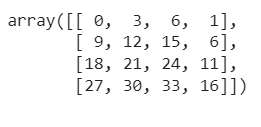




**Exercise 4 :** Dataset for this exercise : [Dataset](https://drive.google.com/file/d/1wpkD2O6jituQE7tJ9tJhtEJm14XJQANV/view?usp=sharing)


Split the businesses mentioned in the above dataset on the basis of `Business Location` and find out the maximum, minimum and mean `Official Amount` of the businesses

**Exercise 5 :** This is a dataset of IPL Teams : [Dataset](https://drive.google.com/file/d/1sfmDBUsIPhfauS_Jj39wHdxTa073yZnE/view?usp=sharing)

Split the dataset by their `National Side` and find out their median and maximum value in crores.


#Pivot tables and cross-tabulations

##Pivot Tables

The pandas.pivot_table() function creates a spreadsheet-style pivot table as a
dataframe. The levels in the pivot table will be stored in MultiIndex objects (hierarchical
indexes) on the index and columns of the resulting dataframe.

**Pivot Tables and Cross-Tabulations**



Pandas offers several options for grouping and summarizing data. We've already discussed
groupby, aggregation, and transformation, but there are other options available, such
as pivot_table and crosstab.

The simplest pivot tables must have a dataframe and an index/list of the index.

Make a pivot table of a new dataframe that consists of the body-style,
drive-wheels, length, width, height, curb-weight, and price columns:

In [ ]:
new_dataset1 = df.filter(["body-style","drive-wheels",
                          "length","width","height","curb-weight","price"],axis=1)
#simplest pivot table with dataframe df and index body-style
table = pd.pivot_table(new_dataset1, index =["body-style"]) 
table

,curb-weight,height,length,price,width
body-style,,,,,
convertible,2801.666667,51.433333,170.383333,24079.550000,65.583333
hardtop,2810.625000,52.850000,176.937500,24429.350000,66.612500
hatchback,2348.185714,52.108571,166.592857,10640.237143,65.247143
sedan,2610.593750,54.337500,177.585417,15574.361458,66.260417
wagon,2784.240000,56.728000,181.304000,13609.156000,66.256000


Design a pivot table with the new_dataset1 dataframe and make bodystyle and drive-wheels as an index. 

Note that providing multiple indexes
will make a grouping of the dataframe first and then summarize the data:

In [ ]:
#pivot table with dataframe df and index body-style and drive-wheels
table = pd.pivot_table(new_dataset1, index =["body-style","drive-wheels"]) 
table

curb-weight     height      length         price  \
body-style  drive-wheels                                                     
convertible fwd           2254.000000  55.600000  159.300000  12754.500000   
            rwd           2911.200000  50.600000  172.600000  26344.560000   
hardtop     fwd           2008.000000  53.300000  162.400000   9073.900000   
            rwd           2925.285714  52.785714  179.014286  26622.985714   
hatchback   4wd           2646.500000  53.850000  167.750000   4181.650000   
            fwd           2181.551020  52.442857  163.944898   9236.026531   
            rwd           2746.526316  51.063158  173.300000  14941.473684   
sedan       4wd           2573.000000  54.300000  173.533333  13912.066667   
            fwd           2298.228070  53.887719  171.812281  10414.278947   
            rwd           3108.305556  55.052778  187.063889  23883.016667   
wagon       4wd           2617.500000  57.000000  171.650000  10005.325000   
            fwd           2464.333333  56.008333  175.441667  10997.066667   
            rwd           3284.888889  57.566667  193.411111  18693.644444   

                              width  
body-style  drive-wheels             
convertible fwd           64.200000  
            rwd           65.860000  
hardtop     fwd           63.800000  
            rwd           67.014286  
hatchback   4wd           65.850000  
            fwd           64.671429  
            rwd           66.668421  
sedan       4wd           65.733333  
            fwd           65.326316  
            rwd           67.783333  
wagon       4wd           64.500000  
            fwd           65.533333  
            rwd           68.000000

The syntax for the pivot table takes some arguments, such as c, values, index,
column, and aggregation function. We can apply the aggregation function to a
pivot table at the same time. We can pass the aggregation function, values, and
columns that aggregation will be applied to, in order to create a pivot table of a
summarized subset of a dataframe:

In [ ]:
# import numpy for aggregration function
import numpy as np

#new data set with few columns
new_dataset3 = df.filter(["body-style","drive-wheels","price"],axis=1)

# pivot table with dataset new_dataset2
# values are the column in which aggregration function is to be applied
# index is column for grouping of data
# columns for specifying category of data 
# aggfunc is the aggregration function to be applied
# fill_value to fill missing values
table = pd.pivot_table(new_dataset3, values='price', index=["body-style"],
                       columns=["drive-wheels"],aggfunc=np.mean,fill_value=0)
table

drive-wheels,4wd,fwd,rwd
body-style,,,
convertible,0.000000,12754.500000,26344.560000
hardtop,0.000000,9073.900000,26622.985714
hatchback,4181.650000,9236.026531,14941.473684
sedan,13912.066667,10414.278947,23883.016667
wagon,10005.325000,10997.066667,18693.644444


The preceding pivot table represents the average price of cars with different
body-style and available drive-wheels in those body-style.

In [ ]:
"""
We can also apply a different aggregation function to different columns:
"""
table = pd.pivot_table(new_dataset1, values=['price','height','width'],
                       index =["body-style","drive-wheels"],
                       aggfunc={'price': np.mean,'height': [min, max],'width': [min, max]},
                       fill_value=0)
table

height               price width      
                            max   min          mean   max   min
body-style  drive-wheels                                       
convertible fwd            55.6  55.6  12754.500000  64.2  64.2
            rwd            53.0  48.8  26344.560000  70.5  64.1
hardtop     fwd            53.3  53.3   9073.900000  63.8  63.8
            rwd            55.4  51.6  26622.985714  72.0  65.0
hatchback   4wd            55.7  52.0   4181.650000  67.9  63.8
            fwd            56.1  49.4   9236.026531  66.6  60.3
            rwd            54.8  49.6  14941.473684  72.3  64.0
sedan       4wd            54.3  54.3  13912.066667  66.4  65.4
            fwd            56.1  50.6  10414.278947  71.4  62.5
            rwd            56.7  47.8  23883.016667  71.7  61.8
wagon       4wd            59.1  54.9  10005.325000  65.4  63.6
            fwd            59.8  53.0  10997.066667  71.4  63.6
            rwd            58.7  54.1  18693.644444  70.3  66.5

##Cross-Tabulations



We can customize the pandas dataframe with another technique called cross-tabulation.
This allows us to cope with groupby and aggregation for better data analysis. pandas has
the crosstab function, which helps when it comes to building a cross-tabulation table. The
cross-tabulation table shows the frequency with which certain groups of data appear. Let's
take a look:

In [ ]:
"""
Let's use pd.crosstab() to look at how many different body styles cars are
made by different makers:
"""

# apply pd.crosstab() function in data frame df
pd.crosstab(df["make"], df["body-style"])

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2,0,1,0,0
audi,0,0,1,5,1
bmw,0,0,0,8,0
chevrolet,0,0,2,1,0
dodge,0,0,5,3,1
honda,0,0,7,5,1
isuzu,0,0,1,3,0
jaguar,0,0,0,3,0
mazda,0,0,10,7,0


Let's apply margins and the margins_name attribute to display the row-wise and
column-wise sum of the cross tables, as shown in the following code:

In [ ]:
# apply margins and margins_name attribute to displays the row wise 
# and column wise sum of the cross table
pd.crosstab(df["make"], df["body-style"],margins=True,margins_name="Total Made")

body-style,convertible,hardtop,hatchback,sedan,wagon,Total Made
make,,,,,,
alfa-romero,2,0,1,0,0,3
audi,0,0,1,5,1,7
bmw,0,0,0,8,0,8
chevrolet,0,0,2,1,0,3
dodge,0,0,5,3,1,9
honda,0,0,7,5,1,13
isuzu,0,0,1,3,0,4
jaguar,0,0,0,3,0,3
mazda,0,0,10,7,0,17


Applying multiple columns in the crosstab function for the row index or
column index or both will print the output with grouping automatically.

Q How the data is distributed by the body-type and drive_wheels
columns within the maker of car and their door type in a crosstab?

In [ ]:
pd.crosstab([df["make"],df["num-of-doors"]], [df["body-style"],df["drive-wheels"]],
            margins=True,margins_name="Total Made")

body-style                 convertible     hardtop     hatchback          \
drive-wheels                       fwd rwd     fwd rwd       4wd fwd rwd   
make          num-of-doors                                                 
alfa-romero   two                    0   2       0   0         0   0   1   
audi          four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         1   0   0   
bmw           four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   0   0   
chevrolet     four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   2   0   
dodge         ?                      0   0       0   0         0   0   0   
              four                   0   0       0   0         0   1   0   
              two                    0   0       0   0         0   4   0   
honda         four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   7   0   
isuzu         four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   0   1   
jaguar        four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   0   0   
mazda         ?                      0   0       0   0         0   0   0   
              four                   0   0       0   0         0   1   0   
              two                    0   0       0   0         0   5   4   
mercedes-benz four                   0   0       0   0         0   0   0   
              two                    0   1       0   2         0   0   0   
mercury       two                    0   0       0   0         0   0   1   
mitsubishi    four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   9   0   
nissan        four                   0   0       0   0         0   1   0   
              two                    0   0       1   0         0   1   3   
peugot        four                   0   0       0   0         0   0   0   
plymouth      four                   0   0       0   0         0   1   0   
              two                    0   0       0   0         0   2   1   
porsche       two                    0   1       0   2         0   0   2   
renault       four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   1   0   
saab          four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         0   3   0   
subaru        four                   0   0       0   0         0   0   0   
              two                    0   0       0   0         1   2   0   
toyota        four                   0   0       0   0         0   6   0   
              two                    0   1       0   3         0   2   6   
volkswagen    four                   0   0       0   0         0   0   0   
              two                    1   0       0   0         0   1   0   
volvo         four                   0   0       0   0         0   0   0   
Total Made                           1   5       1   7         2  49  19   

body-style                 sedan         wagon         Total Made  
drive-wheels                 4wd fwd rwd   4wd fwd rwd             
make          num-of-doors                                         
alfa-romero   two              0   0   0     0   0   0          3  
audi          four             1   3   0     0   1   0          5  
              two              0   1   0     0   0   0          2  
bmw           four             0   0   5     0   0   0          5  
              two              0   0   3     0   0   0          3  
chevrolet     four             0   

Let's rename the column and row index. Renaming gives us a better
understanding of cross-tabulation, as shown in the following code:

In [ ]:
# rename the columns and row index for better understanding of crosstab
pd.crosstab([df["make"],df["num-of-doors"]], [df["body-style"],df["drive-wheels"]],
            rownames=['Auto Manufacturer', "Doors"],
            colnames=['Body Style', "Drive Type"],
            margins=True,margins_name="Total Made").head()



Body Style              convertible     hardtop     hatchback         sedan  \
Drive Type                      fwd rwd     fwd rwd       4wd fwd rwd   4wd   
Auto Manufacturer Doors                                                       
alfa-romero       two             0   2       0   0         0   0   1     0   
audi              four            0   0       0   0         0   0   0     1   
                  two             0   0       0   0         1   0   0     0   
bmw               four            0   0       0   0         0   0   0     0   
                  two             0   0       0   0         0   0   0     0   

Body Style                      wagon         Total Made  
Drive Type              fwd rwd   4wd fwd rwd             
Auto Manufacturer Doors                                   
alfa-romero       two     0   0     0   0   0          3  
audi              four    3   0     0   1   0          5  
                  two     1   0     0   0   0          2  
bmw               four    0   5     0   0   0          5  
                  two     0   3     0   0   0          3

These were some cross-tabulation examples that gave us the frequency
distributions of data in the respective categories.
The pivot table syntax of pd.crosstab also takes some arguments, such as
dataframe columns, values, normalize, and the aggregation function. We can
apply the aggregation function to a cross table at the same time. Passing the
aggregation function and values, which are the columns that aggregation will be
applied to, gives us a cross table of a summarized subset of the dataframe.

let's look at the average curb-weight of cars made by different makers
with respect to their body-style by applying the mean() aggregation function
to the crosstable:

In [ ]:
# values are the column in which aggregration function is to be applied
# aggfunc is the aggregration function to be applied
# round() to round the output

pd.crosstab(df["make"], df["body-style"],values=df["curb-weight"],
            aggfunc='mean').round(0)

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,2548.0,NaN,2823.0,NaN,NaN
audi,NaN,NaN,3053.0,2720.0,2954.0
bmw,NaN,NaN,NaN,2929.0,NaN
chevrolet,NaN,NaN,1681.0,1909.0,NaN
dodge,NaN,NaN,2132.0,2056.0,2535.0
honda,NaN,NaN,1970.0,2289.0,2024.0
isuzu,NaN,NaN,2734.0,2040.0,NaN
jaguar,NaN,NaN,NaN,4027.0,NaN
mazda,NaN,NaN,2254.0,2361.0,NaN


A normalized crosstab will show the percentage of time each combination
occurs. This can be accomplished using the normalize parameter, as follows:

In [ ]:
# top ten output that represents the percentage of occurrence of the combination 
pd.crosstab(df["make"], df["body-style"],normalize=True).head(10)

body-style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
alfa-romero,0.009756,0.000000,0.004878,0.000000,0.000000
audi,0.000000,0.000000,0.004878,0.024390,0.004878
bmw,0.000000,0.000000,0.000000,0.039024,0.000000
chevrolet,0.000000,0.000000,0.009756,0.004878,0.000000
dodge,0.000000,0.000000,0.024390,0.014634,0.004878
honda,0.000000,0.000000,0.034146,0.024390,0.004878
isuzu,0.000000,0.000000,0.004878,0.014634,0.000000
jaguar,0.000000,0.000000,0.000000,0.014634,0.000000
mazda,0.000000,0.000000,0.048780,0.034146,0.000000


Cross-tabulation techniques can be handy when we're trying to analyze two or more
variables. This helps us inspect the relationships between them. 

## Exercises:

**Exercise 1 :**  
There is an existing dataset named `flights` in seaborn. Pivot the dataset such that I see the number of passengers month-wise for different years simultaneously.

(Hint : To import dataset from Seaborn, the commmand is sns.load_dataset( "*dataset_name*") )

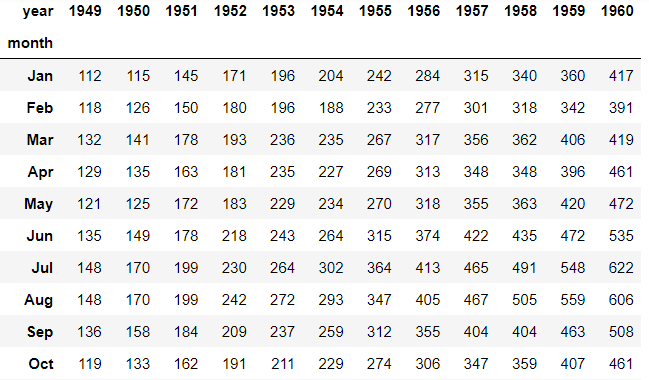

Use this dataset for further exercises: [Sales Report](https://drive.google.com/file/d/1XH8qlCZdaO_-W9EXkmPWeIbwgwa9RIjB/view?usp=sharing)

**Exercise 2:** Write a Pandas program to create a Pivot table and find the region wise total sale.

**Exercise 3:** Write a Pandas program to create a Pivot table and count the manager wise sale and mean value of sale amount.

**Exercise 4:** Find out the category wise sales of each manager using cross-tabulations

Use this dataset for the following exercise : [Passenger List](https://drive.google.com/file/d/1mgwr8OQKnx_fWDa6wr3j5mwSxIymgA6A/view?usp=sharing)

**Exercise 5:** Write a Pandas program to create a Pivot table and find survival rate by gender.

**Exercise 6:** Write a Pandas program to create a Pivot table and find survival rate by gender on various classes.
